___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [PART-03 (HANDLING WITH OUTLIERS)](#1)
* [THE EXAMINATION OF OUTLIERS IN THE COLUMNS](#2) 
* [DUMMY OPERATION](#3)    
* [THE END OF DATA CLEANING (PART - 03)](#4)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy, Pandas & other related you can import them as a library:

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [126]:
# function for first looking to the columns

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

## functions to fill the missing values

In [127]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [128]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [129]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">PART - 03 (Handling with Outliers)</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [130]:
df = pd.read_csv("filled_scout.csv")

In [131]:
df.shape

(15919, 25)

In [132]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Fuel,Diesel,Benzine,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer"
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control"
Safety_Security,"ABS,Central door lock,Daytime running lights,D...","ABS,Central door lock,Central door lock with r...","ABS,Central door lock,Daytime running lights,D..."


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Examination of OUTLIERS in the Columns</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## km

In [133]:
first_looking("km")

column name    :  km
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6692
--------------------------------
10.000       1045
1647.363      985
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6692, dtype: int64


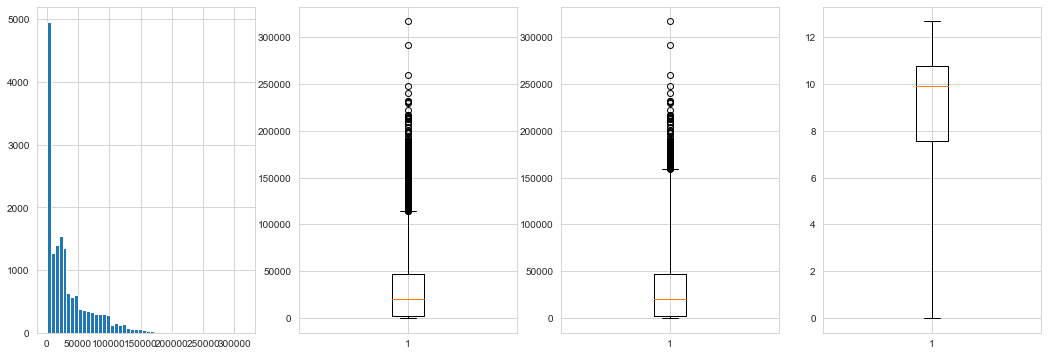

In [134]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.km, bins=50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis=2.5)

plt.show()

In [135]:
#df["km_logged"] = np.log(df.km)

**``km``** **is a variable with a wide range of values. We CANNOT consider the extreme values above as  genuine outliers. So let's keep these extreme values as they are.**

## Gears

In [136]:
first_looking("Gears")

column name    :  Gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
--------------------------------
6.000     8615
5.000     4255
7.000     2810
8.000      225
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: Gears, dtype: int64


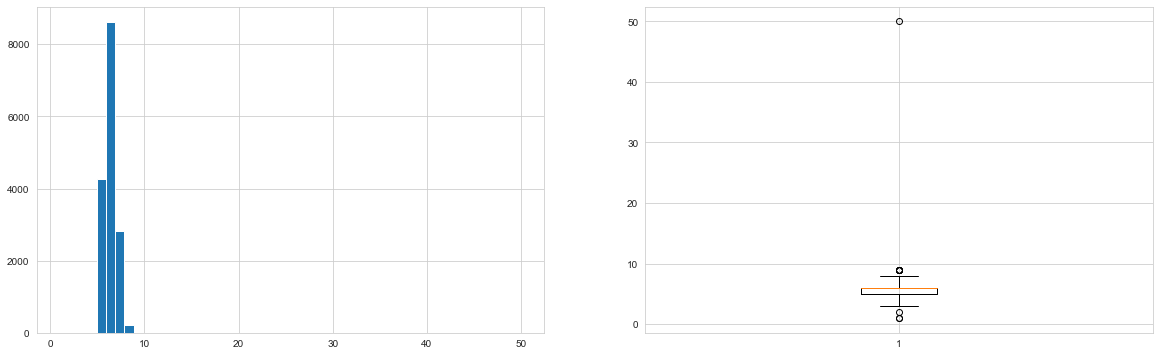

In [137]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=2.5)

plt.show()

In [138]:
df.Gears.describe()

count   15919.000
mean        5.940
std         0.792
min         1.000
25%         5.000
50%         6.000
75%         6.000
max        50.000
Name: Gears, dtype: float64

In [139]:
df.sort_values(by=["Gears"], ascending=False)["Gears"].head(10)

14495   50.000
15827    9.000
15824    9.000
15814    9.000
15869    9.000
15812    9.000
15876    9.000
12463    8.000
12470    8.000
12469    8.000
Name: Gears, dtype: float64

In [140]:
df.sort_values(by=["Gears"], ascending=True)["Gears"].head(10)

8921    1.000
14375   1.000
9812    2.000
15817   3.000
15845   3.000
15823   4.000
15822   4.000
10427   5.000
10428   5.000
10429   5.000
Name: Gears, dtype: float64

In [141]:
# Let's check the observations having extreme Gear value.  
df[(df.Gears < 5) | (df.Gears > 8)][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears
8921,Opel Corsa,Compact,Semi-automatic,1.000
9812,Opel Corsa,Sedans,Manual,2.000
14375,Renault Clio,Compact,Automatic,1.000
14495,Renault Clio,Sedans,Manual,50.000
15812,Renault Espace,Van,Automatic,9.000
15814,Renault Espace,Van,Automatic,9.000
15817,Renault Espace,Van,Automatic,3.000
15822,Renault Espace,Van,Automatic,4.000
15823,Renault Espace,Van,Automatic,4.000
15824,Renault Espace,Van,Automatic,9.000


In [142]:
# Let's check the observations belongs to "Renault Espace" model to see distribution of Gear values.  
df[(df.make_model == "Renault Espace")][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears
14928,Renault Espace,Van,Automatic,6.000
14929,Renault Espace,Station wagon,Automatic,6.000
14930,Renault Espace,Transporter,Automatic,6.000
14931,Renault Espace,Van,Automatic,6.000
14932,Renault Espace,Van,Automatic,6.000
14933,Renault Espace,Transporter,Automatic,6.000
14934,Renault Espace,Van,Automatic,6.000
14935,Renault Espace,Van,Automatic,6.000
14936,Renault Espace,Off-Road,Automatic,6.000
14937,Renault Espace,Van,Automatic,6.000


**Is it possible that there have been modern cars with manual/automatic transmissions with 1, 2, 3, 4, 9, 50 gears?**

Most modern cars with manual transmissions have 5 or 6 forward gears. Most modern cars with automatic transmissions have 5–8 forward gears. A few have as many as 10 [Source](https://www.quora.com/What-are-maximum-number-of-transmission-gears).
Contemporary manual transmissions for cars typically use five or six forward gears ratios and one reverse gear, however, transmissions with between two and seven gears have been produced at times [Source](https://en.wikipedia.org/wiki/Manual_transmission).

In [143]:
df["Gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [144]:
df.Gears.isnull().sum()

14

In [145]:
fill(df, "make_model", "body_type", "Gears", "mode")

Number of NaN :  0
------------------
6.000    8625
5.000    4259
7.000    2810
8.000     225
Name: Gears, dtype: int64


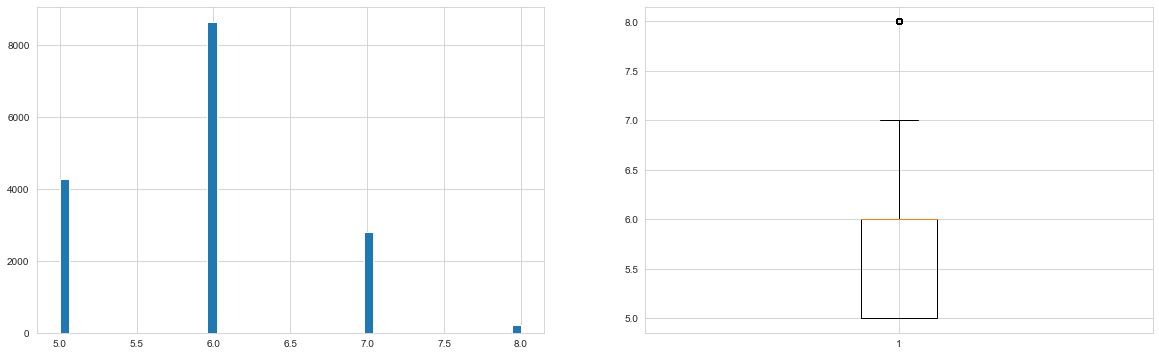

In [146]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=1.5)

plt.show()

## displacement_cc

In [147]:
first_looking("Displacement_cc")

column name    :  Displacement_cc
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
--------------------------------
1598.000     5044
999.000      2467
1398.000     1387
1399.000      768
1229.000      678
1956.000      670
1461.000      667
1490.000      559
1422.000      467
1197.000      372
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1200.000       18
1984.000       18
1397.000       11
899.000        11
160.000         6
929.000         5
1499.000        5
997.000         4
1596.000        4
139.000         4
900.000         4
1599.000        3
1199.000        3
1396.000        3
1495.000        2
1589.000        2
1300.000        2
2.000  

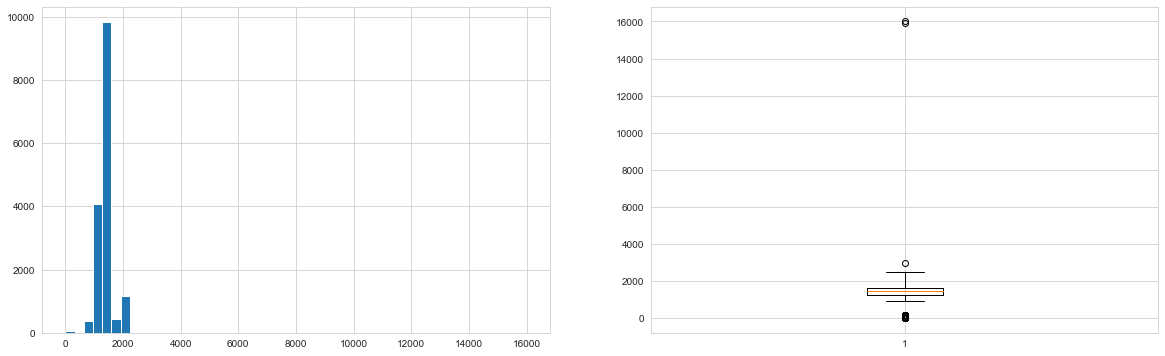

In [148]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement_cc, bins=50)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)

plt.show()

In [149]:
df.Displacement_cc.describe()

count   15919.000
mean     1425.609
std       329.720
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: Displacement_cc, dtype: float64

In [150]:
df.sort_values(by=["Displacement_cc"], ascending=False)["Displacement_cc"].head(5)

10932   16000.000
7169    15898.000
10771    2967.000
3595     2480.000
3587     2480.000
Name: Displacement_cc, dtype: float64

In [151]:
df.sort_values(by=["Displacement_cc"], ascending=True)["Displacement_cc"].head(55)

12790     1.000
14319     1.000
14315     1.000
12849     1.000
12848     1.000
12835     1.000
12823     1.000
12815     1.000
12800     1.000
12798     1.000
12796     1.000
12786     1.000
12783     1.000
12781     1.000
12769     1.000
12768     1.000
12750     1.000
12670     1.000
12604     1.000
12554     1.000
12501     1.000
12499     1.000
12484     1.000
12473     1.000
12467     1.000
14284     1.000
14320     1.000
14321     1.000
14314     1.000
14322     1.000
14328     1.000
14327     1.000
13904     1.000
14325     1.000
14326     1.000
14324     1.000
10559     2.000
14198     2.000
13912    54.000
10194   122.000
7810    139.000
7812    139.000
7811    139.000
7809    139.000
8128    140.000
15578   160.000
15576   160.000
15574   160.000
15575   160.000
15577   160.000
15579   160.000
13653   890.000
14694   898.000
14342   898.000
14695   898.000
Name: Displacement_cc, dtype: float64

In [152]:
outlier_bool_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [153]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement_cc, Length: 15919, dtype: bool

In [154]:
df.loc[outlier_bool_list, "Displacement_cc"] = np.nan

In [155]:
df.Displacement_cc.isnull().sum()

53

In [156]:
fill(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.000    5077
999.000     2467
1398.000    1388
1399.000     772
1461.000     682
1229.000     678
1956.000     670
1490.000     559
1422.000     467
1197.000     372
898.000      351
1395.000     320
1968.000     301
1149.000     288
1618.000     212
1798.000     210
1498.000     196
1600.000     130
1248.000     110
1997.000     103
1364.000     102
1400.000      90
998.000       72
1500.000      50
2000.000      46
1000.000      40
1998.000      25
2480.000      20
1984.000      18
1200.000      18
1397.000      11
899.000       11
929.000        5
1499.000       5
997.000        4
900.000        4
1596.000       4
1599.000       3
1396.000       3
1199.000       3
1589.000       2
1300.000       2
1495.000       2
995.000        2
890.000        1
1333.000       1
1580.000       1
1995.000       1
1533.000       1
1100.000       1
1198.000       1
1496.000       1
1368.000       1
1896.000       1
1584.000       1
1568.000       1
996.000   

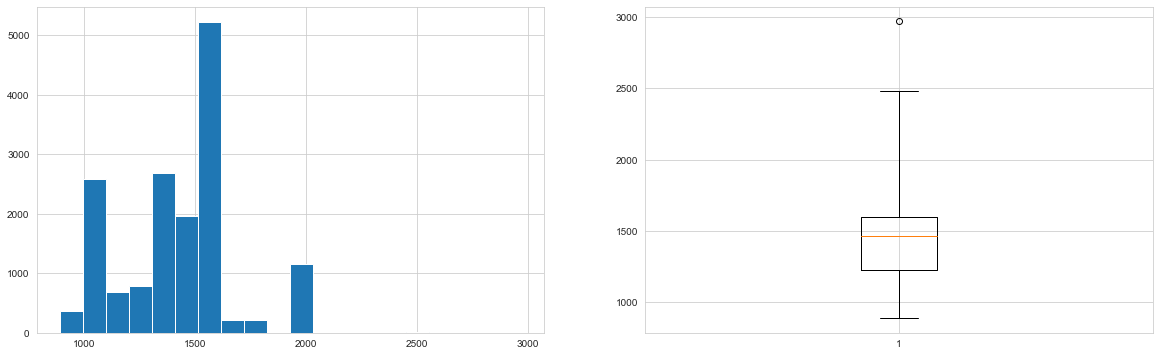

In [157]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement_cc, bins=20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)

plt.show()

## Weight_kg

In [158]:
first_looking("Weight_kg")

column name    :  Weight_kg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  434
--------------------------------
1163.000    1582
1360.000    1419
1487.000     966
1135.000     837
1425.000     744
1180.000     694
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
1119.000     153
1355.000     136
1260.000     127
1280.000     127
1275.000     112
1278.000     110
1255.000     108
1200.000     107
1522.000     103
1659.000     102
1195.000      96
1120.000      93
1403.000      91
1701.000      87
1250.000      85
1685.000      83
1441.000      82
1308.000      80
1285.000      80
1613.000      75
1110.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1325.000      64
1141.000      64
1209.000      64
1071.000      64
1230.000      63
1845.000      56
1090.000      54
1052.000      53
1154.000      52
1664.00

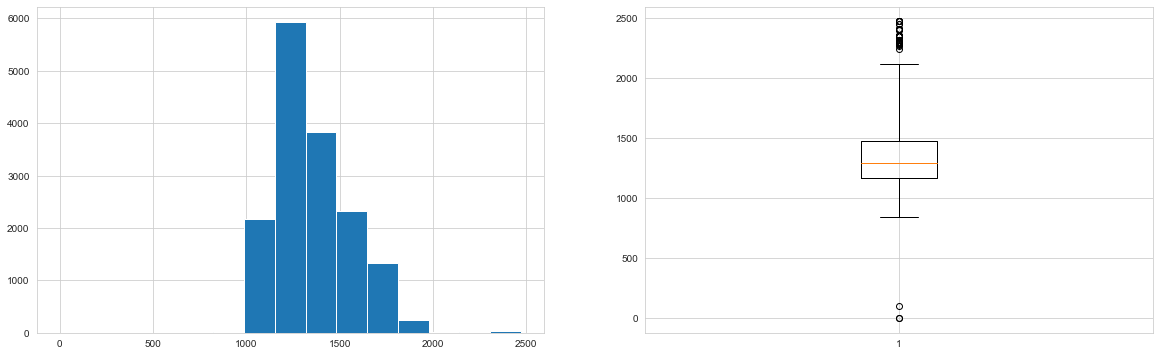

In [159]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

In [160]:
df.Weight_kg.describe()

count   15919.000
mean     1337.432
std       200.466
min         1.000
25%      1165.000
50%      1295.000
75%      1472.000
max      2471.000
Name: Weight_kg, dtype: float64

In [161]:
df["Weight_kg"].sort_values().head(10)

8355      1.000
12779     1.000
1143    102.000
8857    840.000
14313   900.000
13513   977.000
13555   977.000
14654   980.000
14105   980.000
13999   980.000
Name: Weight_kg, dtype: float64

In [162]:
df["Weight_kg"].replace([1, 102], np.nan, inplace = True)

In [163]:
df["Weight_kg"].isnull().sum()

3

In [164]:
fill(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  0
------------------
1163.000    1583
1360.000    1419
1487.000     967
1135.000     837
1425.000     744
1180.000     695
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
1119.000     153
1355.000     136
1280.000     127
1260.000     127
1275.000     112
1278.000     110
1255.000     108
1200.000     107
1522.000     103
1659.000     102
1195.000      96
1120.000      93
1403.000      91
1701.000      87
1250.000      85
1685.000      83
1441.000      82
1308.000      80
1285.000      80
1613.000      75
1110.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1071.000      64
1141.000      64
1209.000      64
1325.000      64
1230.000      63
1845.000      56
1090.000      54
1052.000      53
1154.000      52
1664.000      52
1513.000      51
1065.000      50
1237.000      49
1440.000      46
1205.000      46
1088.000      46
1265.000  

In [165]:
df["Weight_kg"].isnull().sum()

0

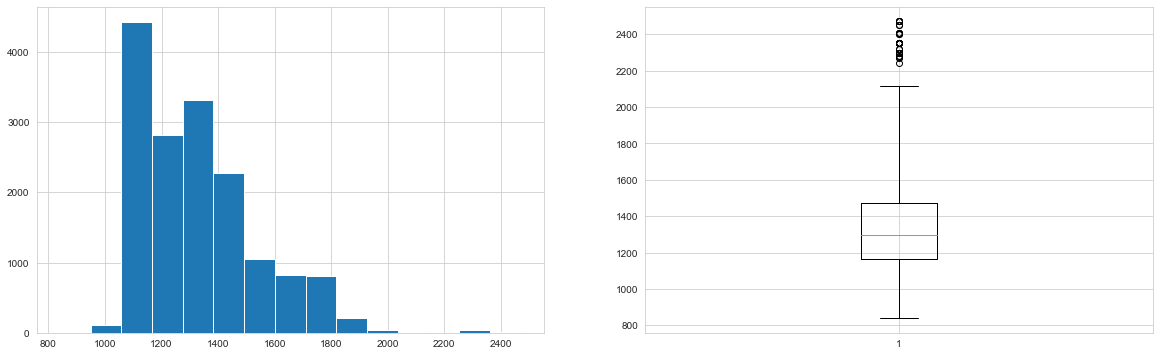

In [166]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

## hp_kW

In [167]:
first_looking("hp_kW")

column name    :  hp_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  80
--------------------------------
85.000     2543
66.000     2124
81.000     1403
100.000    1314
110.000    1113
70.000      890
125.000     711
51.000      696
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
1.000        20
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
120.000       8
104.000       8
112.000       7
191.000       7
155.000       6
117.000       6
184.000       5
65.000        4
90.000        4
76.000        4
168.000       3
98.000        3
149.000      

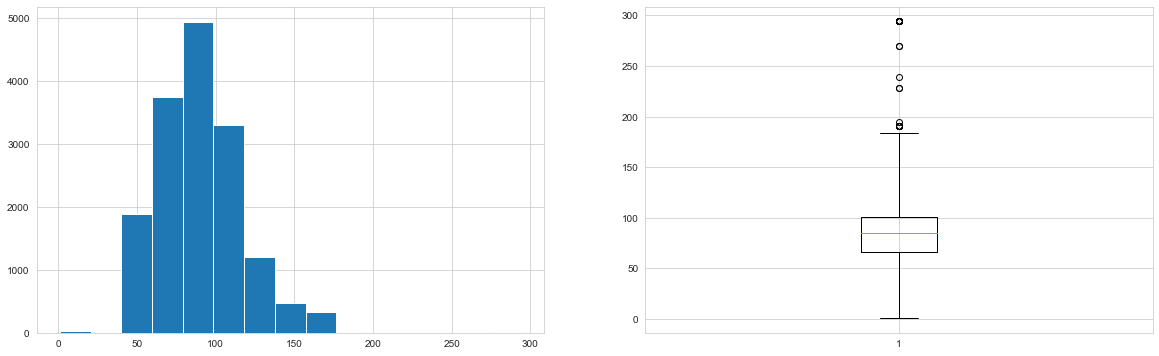

In [168]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

In [169]:
df.hp_kW.describe()

count   15919.000
mean       88.374
std        26.844
min         1.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: hp_kW, dtype: float64

In [170]:
df.hp_kW.sort_values().head(50)

6034     1.000
6946     1.000
7014     1.000
9285     1.000
9287     1.000
6005     1.000
9288     1.000
7018     1.000
9289     1.000
9290     1.000
9292     1.000
9299     1.000
10610    1.000
10580    1.000
10579    1.000
10468    1.000
15155    1.000
15156    1.000
7019     1.000
7016     1.000
13885    4.000
3913     9.000
8857    40.000
13759   40.000
8408    44.000
10282   51.000
10283   51.000
10284   51.000
10285   51.000
10286   51.000
10287   51.000
9145    51.000
10288   51.000
10346   51.000
10281   51.000
10330   51.000
9026    51.000
9025    51.000
10342   51.000
10289   51.000
9159    51.000
9384    51.000
9158    51.000
10290   51.000
10291   51.000
10345   51.000
10280   51.000
10279   51.000
10278   51.000
10264   51.000
Name: hp_kW, dtype: float64

In [171]:
np.sort(df.hp_kW.unique())

array([  1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,  76.,
        77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110., 112.,
       115., 117., 118., 119., 120., 121., 122., 123., 125., 127., 132.,
       133., 135., 137., 140., 141., 143., 146., 147., 149., 150., 154.,
       155., 162., 163., 164., 165., 167., 168., 184., 191., 195., 228.,
       239., 270., 294.])

In [172]:
df.hp_kW.loc[df.hp_kW < 51] = np.nan

In [173]:
df.hp_kW.isnull().sum()

25

In [174]:
fill(df, "make_model", "body_type", "hp_kW", "mode")

Number of NaN :  0
------------------
85.000     2544
66.000     2126
81.000     1403
100.000    1317
110.000    1117
70.000      890
125.000     715
51.000      703
55.000      589
118.000     552
92.000      466
121.000     392
147.000     380
77.000      353
56.000      296
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
90.000        4
76.000        4
65.000        4
80.000        3
93.000        3
168.000       3
149.000       3
98.000        3
150.000       2
228.000       2
53.000        2
270.000       2
86.000        2
167.000       2
63

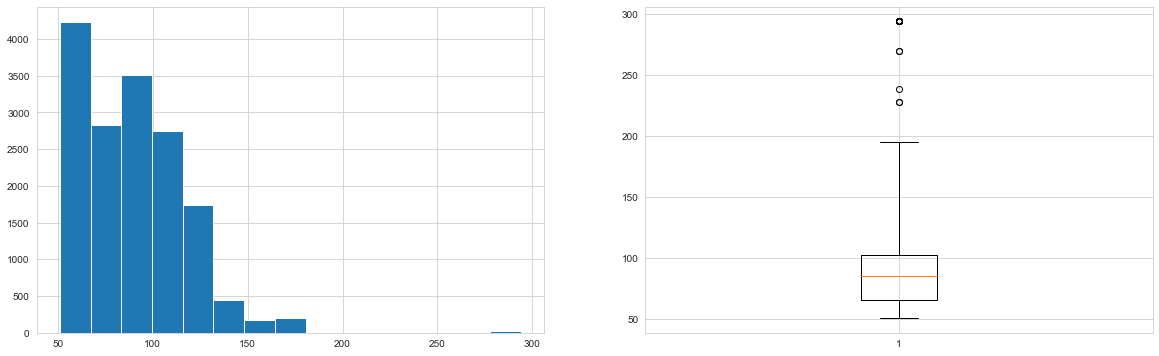

In [175]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

## CO2_Emission

In [176]:
first_looking("CO2_Emission")

column name    :  CO2_Emission
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  124
--------------------------------
120.000      1000
104.000       782
97.000        631
99.000        593
124.000       574
102.000       501
85.000        456
103.000       445
128.000       425
106.000       418
105.000       401
117.000       394
114.000       390
119.000       381
107.000       379
137.000       376
108.000       362
129.000       356
126.000       353
118.000       270
110.000       266
127.000       257
135.000       252
113.000       237
111.000       237
109.000       234
139.000       224
140.000       218
141.000       214
92.000        198
123.000       189
130.000       180
150.000       174
112.000       171
143.000       171
95.000        161
116.000       157
98.000        156
131.000       151
153.000       149
101.000       147
136.000       145
133.000       145
125.000       133
134.000       130
145.000       126
149.000  

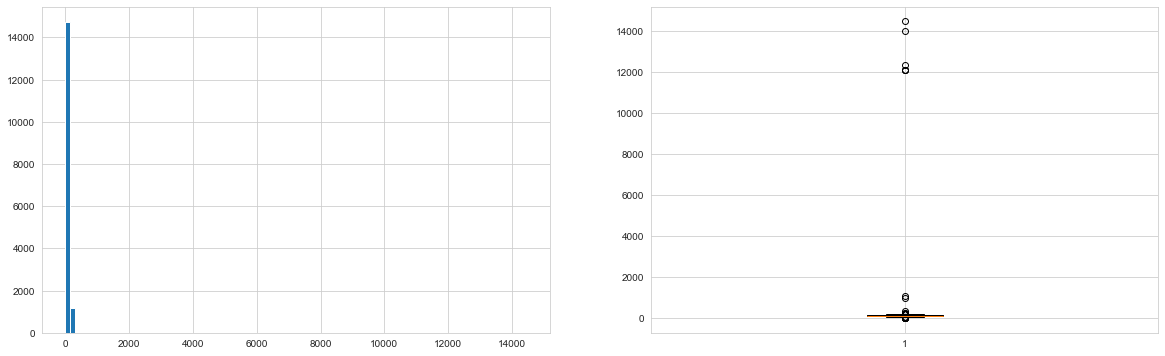

In [177]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

In [178]:
df.CO2_Emission.describe()

count   15919.000
mean      122.619
std       248.534
min         0.000
25%       104.000
50%       117.000
75%       129.000
max     14457.000
Name: CO2_Emission, dtype: float64

In [179]:
df.CO2_Emission.value_counts().sort_index()

0.000           2
1.000           1
5.000           3
14.000          1
36.000          5
45.000          1
51.000          1
80.000          1
82.000         25
84.000          2
85.000        456
87.000          6
88.000         15
89.000         19
90.000         35
91.000         31
92.000        198
93.000         66
94.000         42
95.000        161
96.000         22
97.000        631
98.000        156
99.000        593
100.000        55
101.000       147
102.000       501
103.000       445
104.000       782
105.000       401
106.000       418
107.000       379
108.000       362
109.000       234
110.000       266
111.000       237
112.000       171
113.000       237
114.000       390
115.000        86
116.000       157
117.000       394
118.000       270
119.000       381
120.000      1000
121.000        82
122.000        84
123.000       189
124.000       574
125.000       133
126.000       353
127.000       257
128.000       425
129.000       356
130.000       180
131.000   

In [180]:
df.groupby(["make_model", "body_type", "CO2_Emission"]).price.describe()

count      mean       std  \
make_model     body_type     CO2_Emission                               
Audi A1        Compact       90.000         1.000 12880.000       NaN   
                             91.000         5.000 13038.000  1108.927   
                             92.000         1.000 12479.000       NaN   
                             94.000         5.000 13960.000  1232.071   
                             97.000       113.000 15449.593  2445.755   
                             98.000        33.000 16574.364  2637.087   
                             99.000        19.000 16043.947  2257.403   
                             100.000        4.000 16127.500  1583.401   
                             102.000      170.000 16551.159  2943.687   
                             103.000       30.000 21233.033  1794.551   
                             104.000      126.000 17411.413  3149.373   
                             105.000       14.000 22234.857   812.264   
                             106.000      112.000 19622.223  3864.432   
                             107.000       13.000 16527.692  1620.412   
                             108.000       42.000 23587.095  3375.693   
                             109.000       34.000 17029.324  2514.314   
                             110.000       51.000 26340.373  2434.738   
                             111.000      138.000 23765.283  3477.921   
                             112.000       25.000 19960.360  2676.262   
                             113.000        5.000 20388.000  2796.188   
                             114.000        1.000 15490.000       NaN   
                             115.000        7.000 24067.857  6950.650   
                             116.000       20.000 23580.950  2813.103   
                             117.000        8.000 19094.875  2942.954   
                             118.000        2.000 13615.000    91.924   
                             119.000        1.000 12550.000       NaN   
                             120.000       27.000 15850.000     0.000   
                             121.000        2.000 18710.000  3224.407   
                             122.000        1.000 20881.000       NaN   
                             123.000       17.000 19308.647  3816.070   
                             126.000        1.000 19999.000       NaN   
                             127.000        2.000 19888.000     0.000   
                             134.000        2.000 22495.000   841.457   
                             136.000        2.000 29088.000   128.693   
                             137.000        2.000 28660.000   282.843   
                             142.000        2.000 28750.000   268.701   
                             331.000        1.000 12990.000       NaN   
               Coupe         97.000         2.000 14925.000  1378.858   
               Sedans        89.000         4.000 16572.500   288.141   
                             90.000         3.000 14396.333   532.382   
                             91.000        14.000 14228.500  1438.927   
                             92.000        42.000 15764.548  1578.276   
                             94.000        12.000 15710.000  2522.329   
                             95.000         2.000 13070.000  2305.168   
                             97.000       315.000 14905.857  1996.270   
                             98.000        66.000 16021.848  1512.571   
                             99.000       148.000 16132.919  2295.535   
                             100.000        3.000 14490.000     0.000   
                             101.000        5.000 19228.000  1683.574   
                             102.000      198.000 17497.909  2518.189   
                             103.000       10.000 17725.000  3092.084   
                             104.000      256.000 20179.859  3917.247   
                             105.000       55.000 19634.273  2174.292   
                             

In [181]:
df[df['Fuel']=='Electric']['CO2_Emission']

3356    36.000
3612    36.000
3615    36.000
3617    36.000
13397   36.000
Name: CO2_Emission, dtype: float64

In [182]:
cond = ((df.CO2_Emission < 36) | (df.CO2_Emission > 330))

df.loc[cond, "CO2_Emission"] = np.nan

In [183]:
df.CO2_Emission.isnull().sum()

16

In [184]:
fill(df, "make_model", "body_type", "CO2_Emission", "median")

Number of NaN :  0
------------------
120.000    1000
104.000     782
97.000      631
99.000      593
124.000     574
102.000     501
85.000      456
103.000     445
128.000     425
106.000     420
105.000     402
117.000     394
114.000     390
119.000     384
107.000     379
137.000     376
108.000     362
129.000     357
126.000     353
118.000     270
110.000     266
127.000     257
135.000     252
113.000     237
111.000     237
109.000     234
139.000     224
140.000     218
141.000     214
92.000      198
123.000     189
130.000     180
150.000     174
112.000     171
143.000     171
95.000      161
116.000     157
98.000      156
131.000     152
153.000     149
101.000     147
136.000     145
133.000     145
125.000     133
134.000     130
145.000     126
149.000     117
147.000     109
132.000     100
115.000      86
122.000      84
121.000      82
138.000      79
93.000       66
168.000      58
142.000      58
100.000      55
148.000      48
94.000       42
154.000      40
14

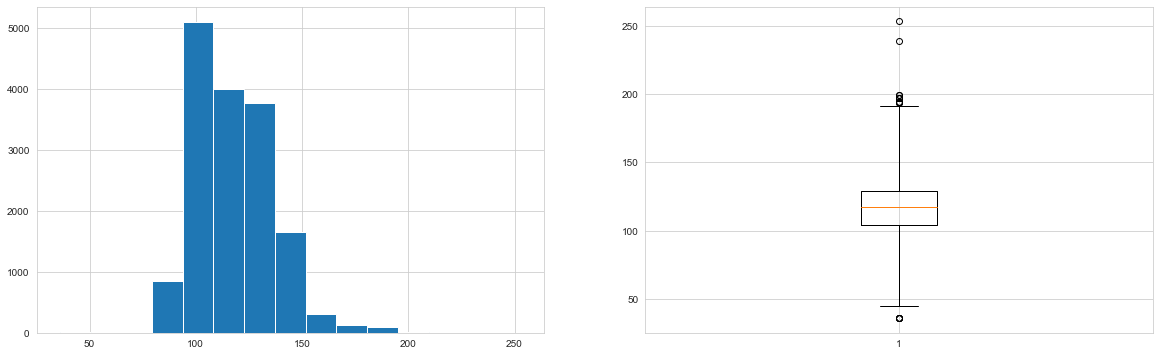

In [185]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=15)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

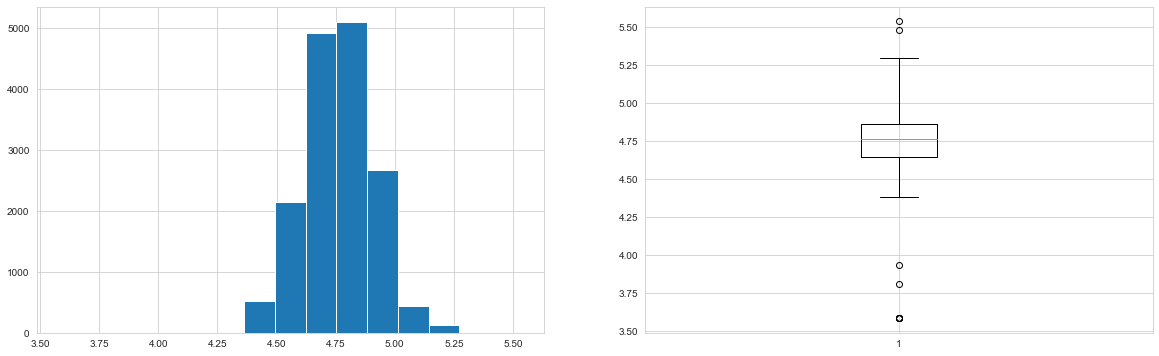

In [186]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(np.log(df.CO2_Emission), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.CO2_Emission), whis=2.5)

plt.show()

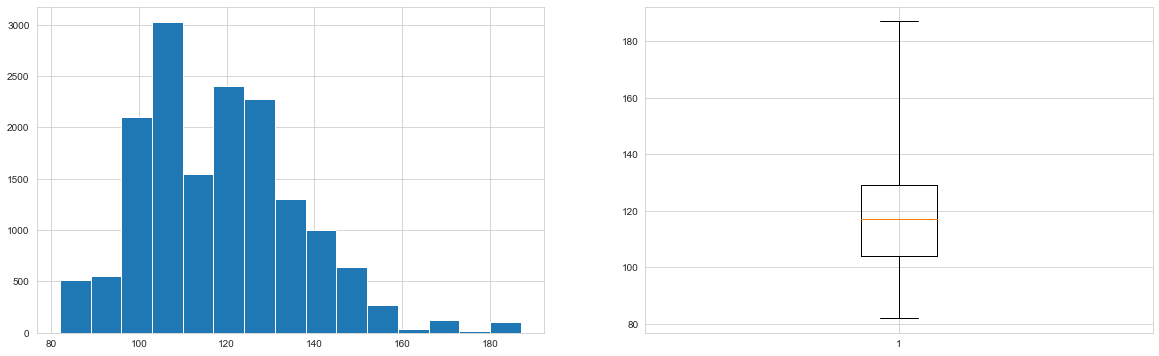

In [187]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(winsorize(df.CO2_Emission, (0.001, 0.003)), bins = 15)

plt.subplot(122)
plt.boxplot(winsorize(df.CO2_Emission, (0.001, 0.003)), whis=2.5)

plt.show()

## cons_comb

In [188]:
first_looking("cons_comb")

column name    :  cons_comb
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  63
--------------------------------
5.400    990
4.000    905
3.900    846
4.700    785
5.600    781
5.100    769
3.800    678
5.200    666
4.400    624
4.800    580
5.000    553
4.600    539
4.500    524
4.900    495
3.300    446
3.700    441
4.200    436
5.900    395
5.300    390
5.500    383
5.700    342
4.100    342
6.000    331
4.300    308
3.500    288
6.200    260
3.600    232
6.100    182
6.300    181
5.800    165
6.800    156
6.600    148
3.400    130
5.350    101
6.400     75
3.000     69
7.400     66
6.500     43
6.700     43
7.100     38
6.900     27
3.200     25
3.650     20
8.300     20
5.150     19
7.600     14
7.000     10
5.850      7
3.100      7
7.200      6
7.800      6
8.000      5
1.600      5
8.600      4
3.950      3
8.700      3
7.900      3
7.300      2
8.100      2
5.450      2
4.550      1
9.100      1
7.500      1
Name: cons_comb, dtype

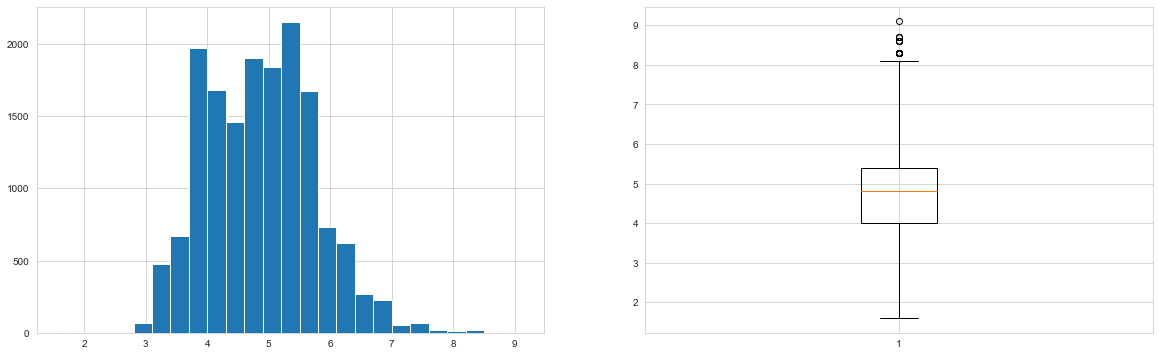

In [189]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2)

plt.show()

In [190]:
df.cons_comb.describe()

count   15919.000
mean        4.823
std         0.890
min         1.600
25%         4.000
50%         4.800
75%         5.400
max         9.100
Name: cons_comb, dtype: float64

In [191]:
df.cons_comb.sort_values().head(10)

3615    1.600
13397   1.600
3612    1.600
3356    1.600
3617    1.600
8805    3.000
13493   3.000
6240    3.000
6241    3.000
13494   3.000
Name: cons_comb, dtype: float64

In [192]:
df.cons_comb.sort_values().tail(10)

10515   8.300
3601    8.300
10789   8.600
12553   8.600
12422   8.600
12530   8.600
12054   8.700
10817   8.700
12529   8.700
10771   9.100
Name: cons_comb, dtype: float64

**Considering our domain knowledge, we can conclude that min value of 1.6 and max value of 9.10 are normal.**

## Nr_of_Doors

In [193]:
first_looking("Nr_of_Doors")

column name    :  Nr_of_Doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64


In [194]:
df.Nr_of_Doors.replace([1, 7], np.nan, inplace=True)

In [195]:
df.Nr_of_Doors.isnull().sum()

2

In [196]:
fill(df, "make_model", "body_type", "Nr_of_Doors", "mode")

Number of NaN :  0
------------------
5.000    11789
4.000     3079
3.000      832
2.000      219
Name: Nr_of_Doors, dtype: int64


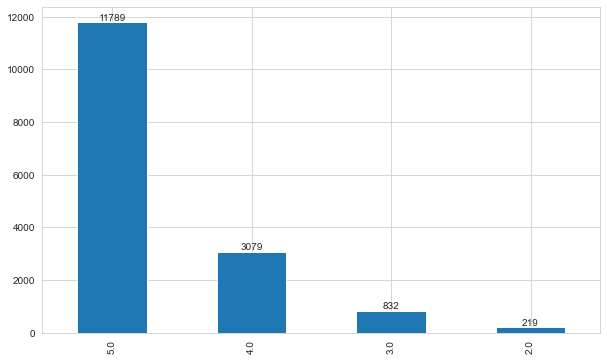

In [197]:
fig, ax = plt.subplots()

df.Nr_of_Doors.value_counts(dropna = False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

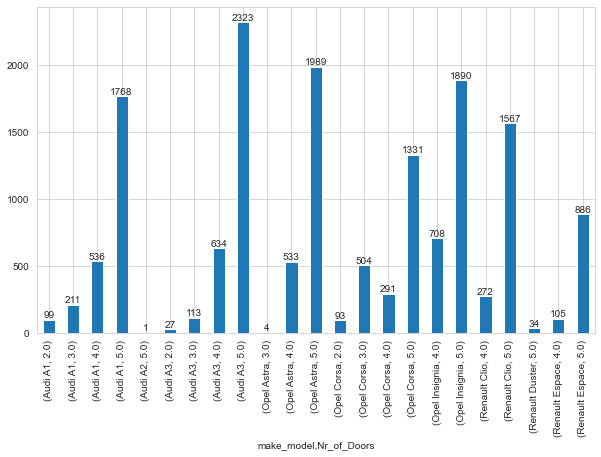

In [198]:
fig, ax = plt.subplots()

df.groupby(["make_model", "Nr_of_Doors"]).Nr_of_Doors.count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [199]:
df.drop("Nr_of_Doors", axis=1, inplace=True)

In [200]:
df.shape

(15919, 24)

## Nr_of_Seats

In [201]:
first_looking("Nr_of_Seats")

column name    :  Nr_of_Seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64


In [202]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [203]:
df.Nr_of_Seats.isnull().sum()

3

In [204]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.000    14311
4.000     1127
7.000      362
2.000      119
Name: Nr_of_Seats, dtype: int64


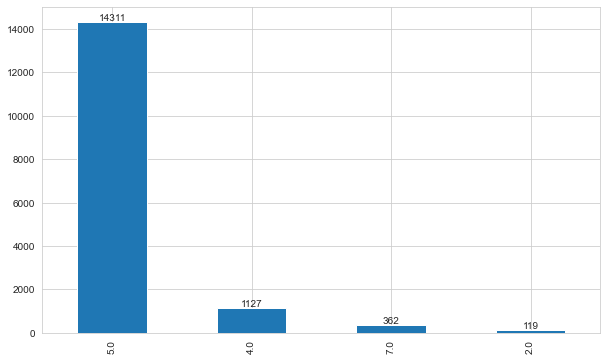

In [205]:
fig, ax = plt.subplots()

df.Nr_of_Seats.value_counts(dropna=False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

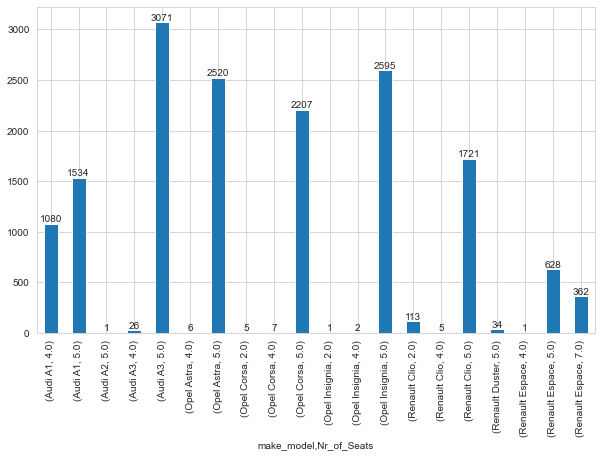

In [206]:
fig, ax = plt.subplots()

df.groupby(["make_model", "Nr_of_Seats"]).Nr_of_Seats.count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [207]:
df.drop("Nr_of_Seats", axis=1, inplace=True)

In [208]:
df.shape

(15919, 23)

## price

In [209]:
first_looking("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2956
--------------------------------
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64


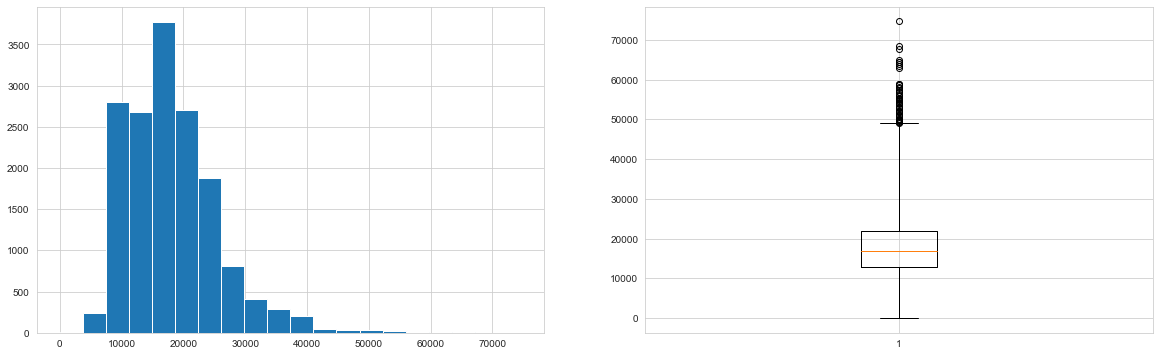

In [210]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [211]:
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [212]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [213]:
drop_index = df.price.sort_values().index[:4]
drop_index

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

In [214]:
df.drop(drop_index, axis=0, inplace=True)

In [215]:
df.shape

(15915, 23)

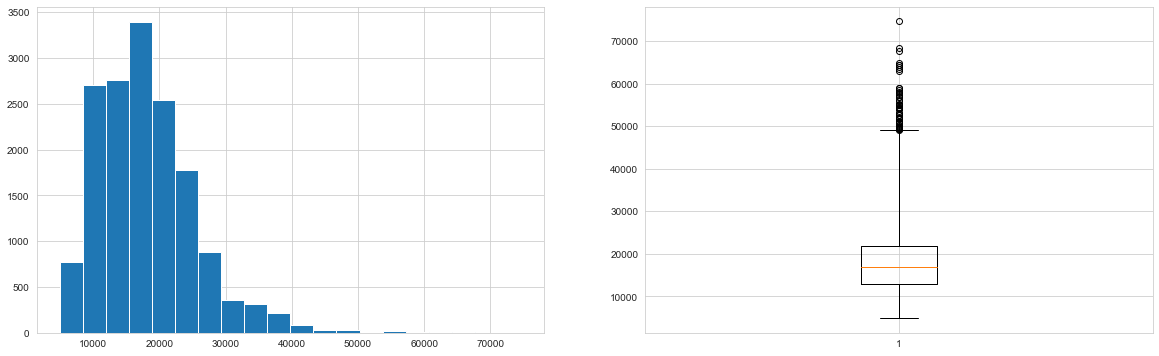

In [216]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

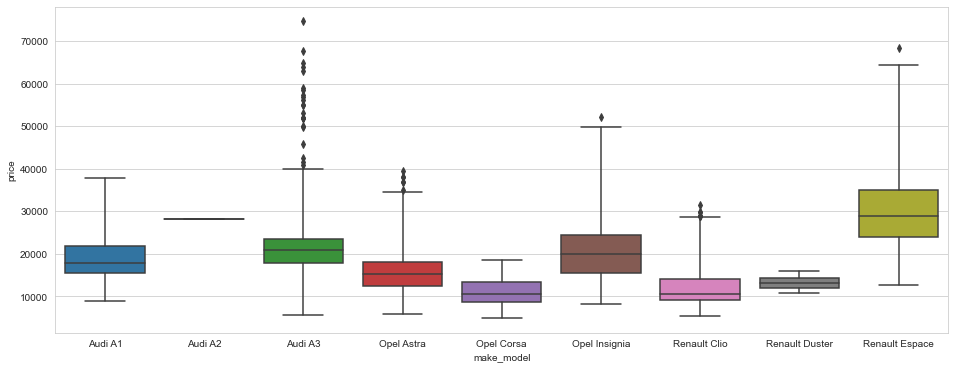

In [217]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## make_model

In [218]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


In [219]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission
2614,Audi A2,Off-Road,28200,26166.000,Employee's car,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000,1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900,117.000


The **``Audi A2``** (internally designated Typ 8Z) is a compact MPV-styled supermini car, with a five-door hatchback body style and four or five seats, produced by the German manufacturer Audi **from November 1999 (for the 2000 model year) to August 2005** [Source](https://en.wikipedia.org/wiki/Audi_A2). **So it is impossible to be a 1-year old Audi A2**.

In [220]:
drop_index = df[df.make_model == "Audi A2"].index
drop_index

Int64Index([2614], dtype='int64')

In [221]:
df.drop(drop_index, axis=0, inplace=True)

In [222]:
df.shape

(15914, 23)

## Fuel

In [223]:
first_looking("Fuel")

column name    :  Fuel
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64


In [224]:
df[df.Fuel == "Electric"][["make_model", "body_type", "CO2_Emission", "Gears", "hp_kW", "cons_comb", "price"]]

,make_model,body_type,CO2_Emission,Gears,hp_kW,cons_comb,price
3356,Audi A3,Compact,36.000,6.000,150.000,1.600,24950
3612,Audi A3,Sedans,36.000,6.000,110.000,1.600,38450
3615,Audi A3,Sedans,36.000,6.000,110.000,1.600,35899
3617,Audi A3,Sedans,36.000,6.000,110.000,1.600,38000
13397,Renault Clio,Sedans,36.000,6.000,55.000,1.600,8490


In [225]:
drop_index = df[df.Fuel == "Electric"].index
drop_index

Int64Index([3356, 3612, 3615, 3617, 13397], dtype='int64')

In [226]:
df.drop(drop_index, axis=0, inplace=True)

In [227]:
df.reset_index(drop=True, inplace=True)

In [228]:
df.shape

(15909, 23)

## Final_Step

In [229]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Fuel,Diesel,Benzine,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer"
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control"
Safety_Security,"ABS,Central door lock,Daytime running lights,D...","ABS,Central door lock,Central door lock with r...","ABS,Central door lock,Daytime running lights,D..."


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15909 non-null  object 
 2   price                15909 non-null  int64  
 3   km                   15909 non-null  float64
 4   Type                 15909 non-null  object 
 5   Fuel                 15909 non-null  object 
 6   Comfort_Convenience  15909 non-null  object 
 7   Entertainment_Media  15909 non-null  object 
 8   Extras               15909 non-null  object 
 9   Safety_Security      15909 non-null  object 
 10  Gears                15909 non-null  float64
 11  age                  15909 non-null  float64
 12  Previous_Owners      15909 non-null  float64
 13  hp_kW                15909 non-null  float64
 14  Inspection_new       15909 non-null  int64  
 15  Paint_Type           15909 non-null 

In [231]:
df_num = df.select_dtypes("number")
df_num

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,99.000
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,129.000
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,99.000
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,99.000
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,109.000
...,...,...,...,...,...,...,...,...,...,...,...
15904,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300,139.000
15905,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400,168.000
15906,39875,15.000,6.000,0.000,1.000,146.000,1,1997.000,1734.000,5.300,139.000
15907,39700,10.000,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300,139.000


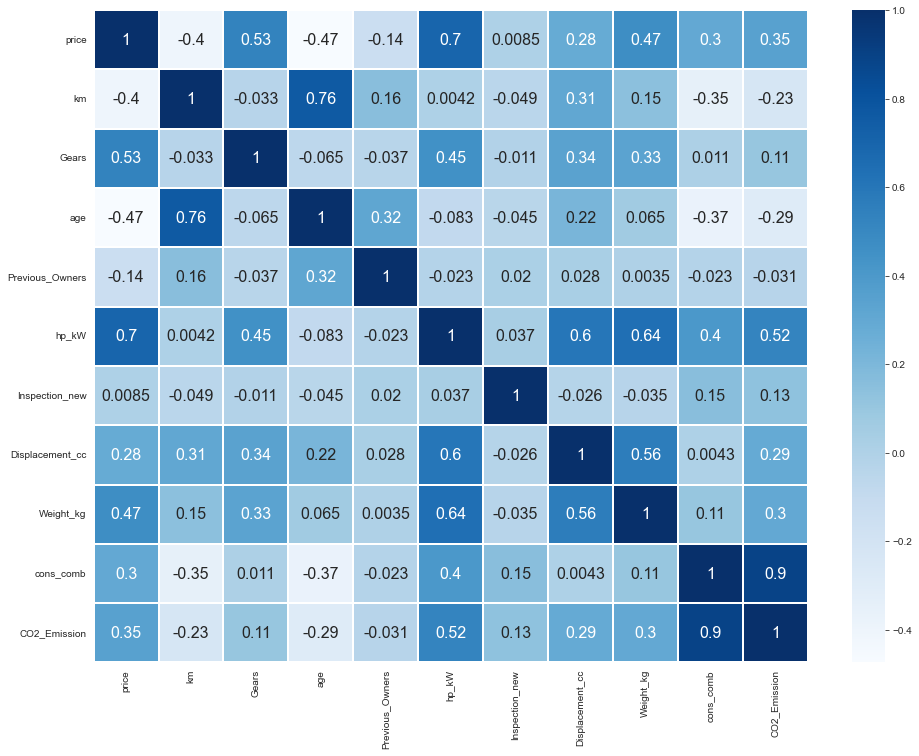

In [232]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_num.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

In [233]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df_num.corr().style.applymap(color_correlation)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
price,1.000000,-0.399443,0.530563,-0.473689,-0.144672,0.696487,0.008508,0.282075,0.468264,0.301448,0.347668
km,-0.399443,1.000000,-0.033087,0.758370,0.157039,0.004206,-0.049485,0.306792,0.147246,-0.345228,-0.227640
Gears,0.530563,-0.033087,1.000000,-0.064507,-0.036594,0.449571,-0.011026,0.339431,0.334002,0.011357,0.106674
age,-0.473689,0.758370,-0.064507,1.000000,0.316166,-0.083391,-0.045467,0.215304,0.065081,-0.371941,-0.288236
Previous_Owners,-0.144672,0.157039,-0.036594,0.316166,1.000000,-0.022559,0.019519,0.027961,0.003460,-0.022799,-0.030866
hp_kW,0.696487,0.004206,0.449571,-0.083391,-0.022559,1.000000,0.036782,0.597721,0.638280,0.403609,0.522893
Inspection_new,0.008508,-0.049485,-0.011026,-0.045467,0.019519,0.036782,1.000000,-0.025975,-0.035456,0.154669,0.134247
Displacement_cc,0.282075,0.306792,0.339431,0.215304,0.027961,0.597721,-0.025975,1.000000,0.563594,0.004314,0.288515
Weight_kg,0.468264,0.147246,0.334002,0.065081,0.003460,0.638280,-0.035456,0.563594,1.000000,0.105840,0.298414
cons_comb,0.301448,-0.345228,0.011357,-0.371941,-0.022799,0.403609,0.154669,0.004314,0.105840,1.000000,0.896209


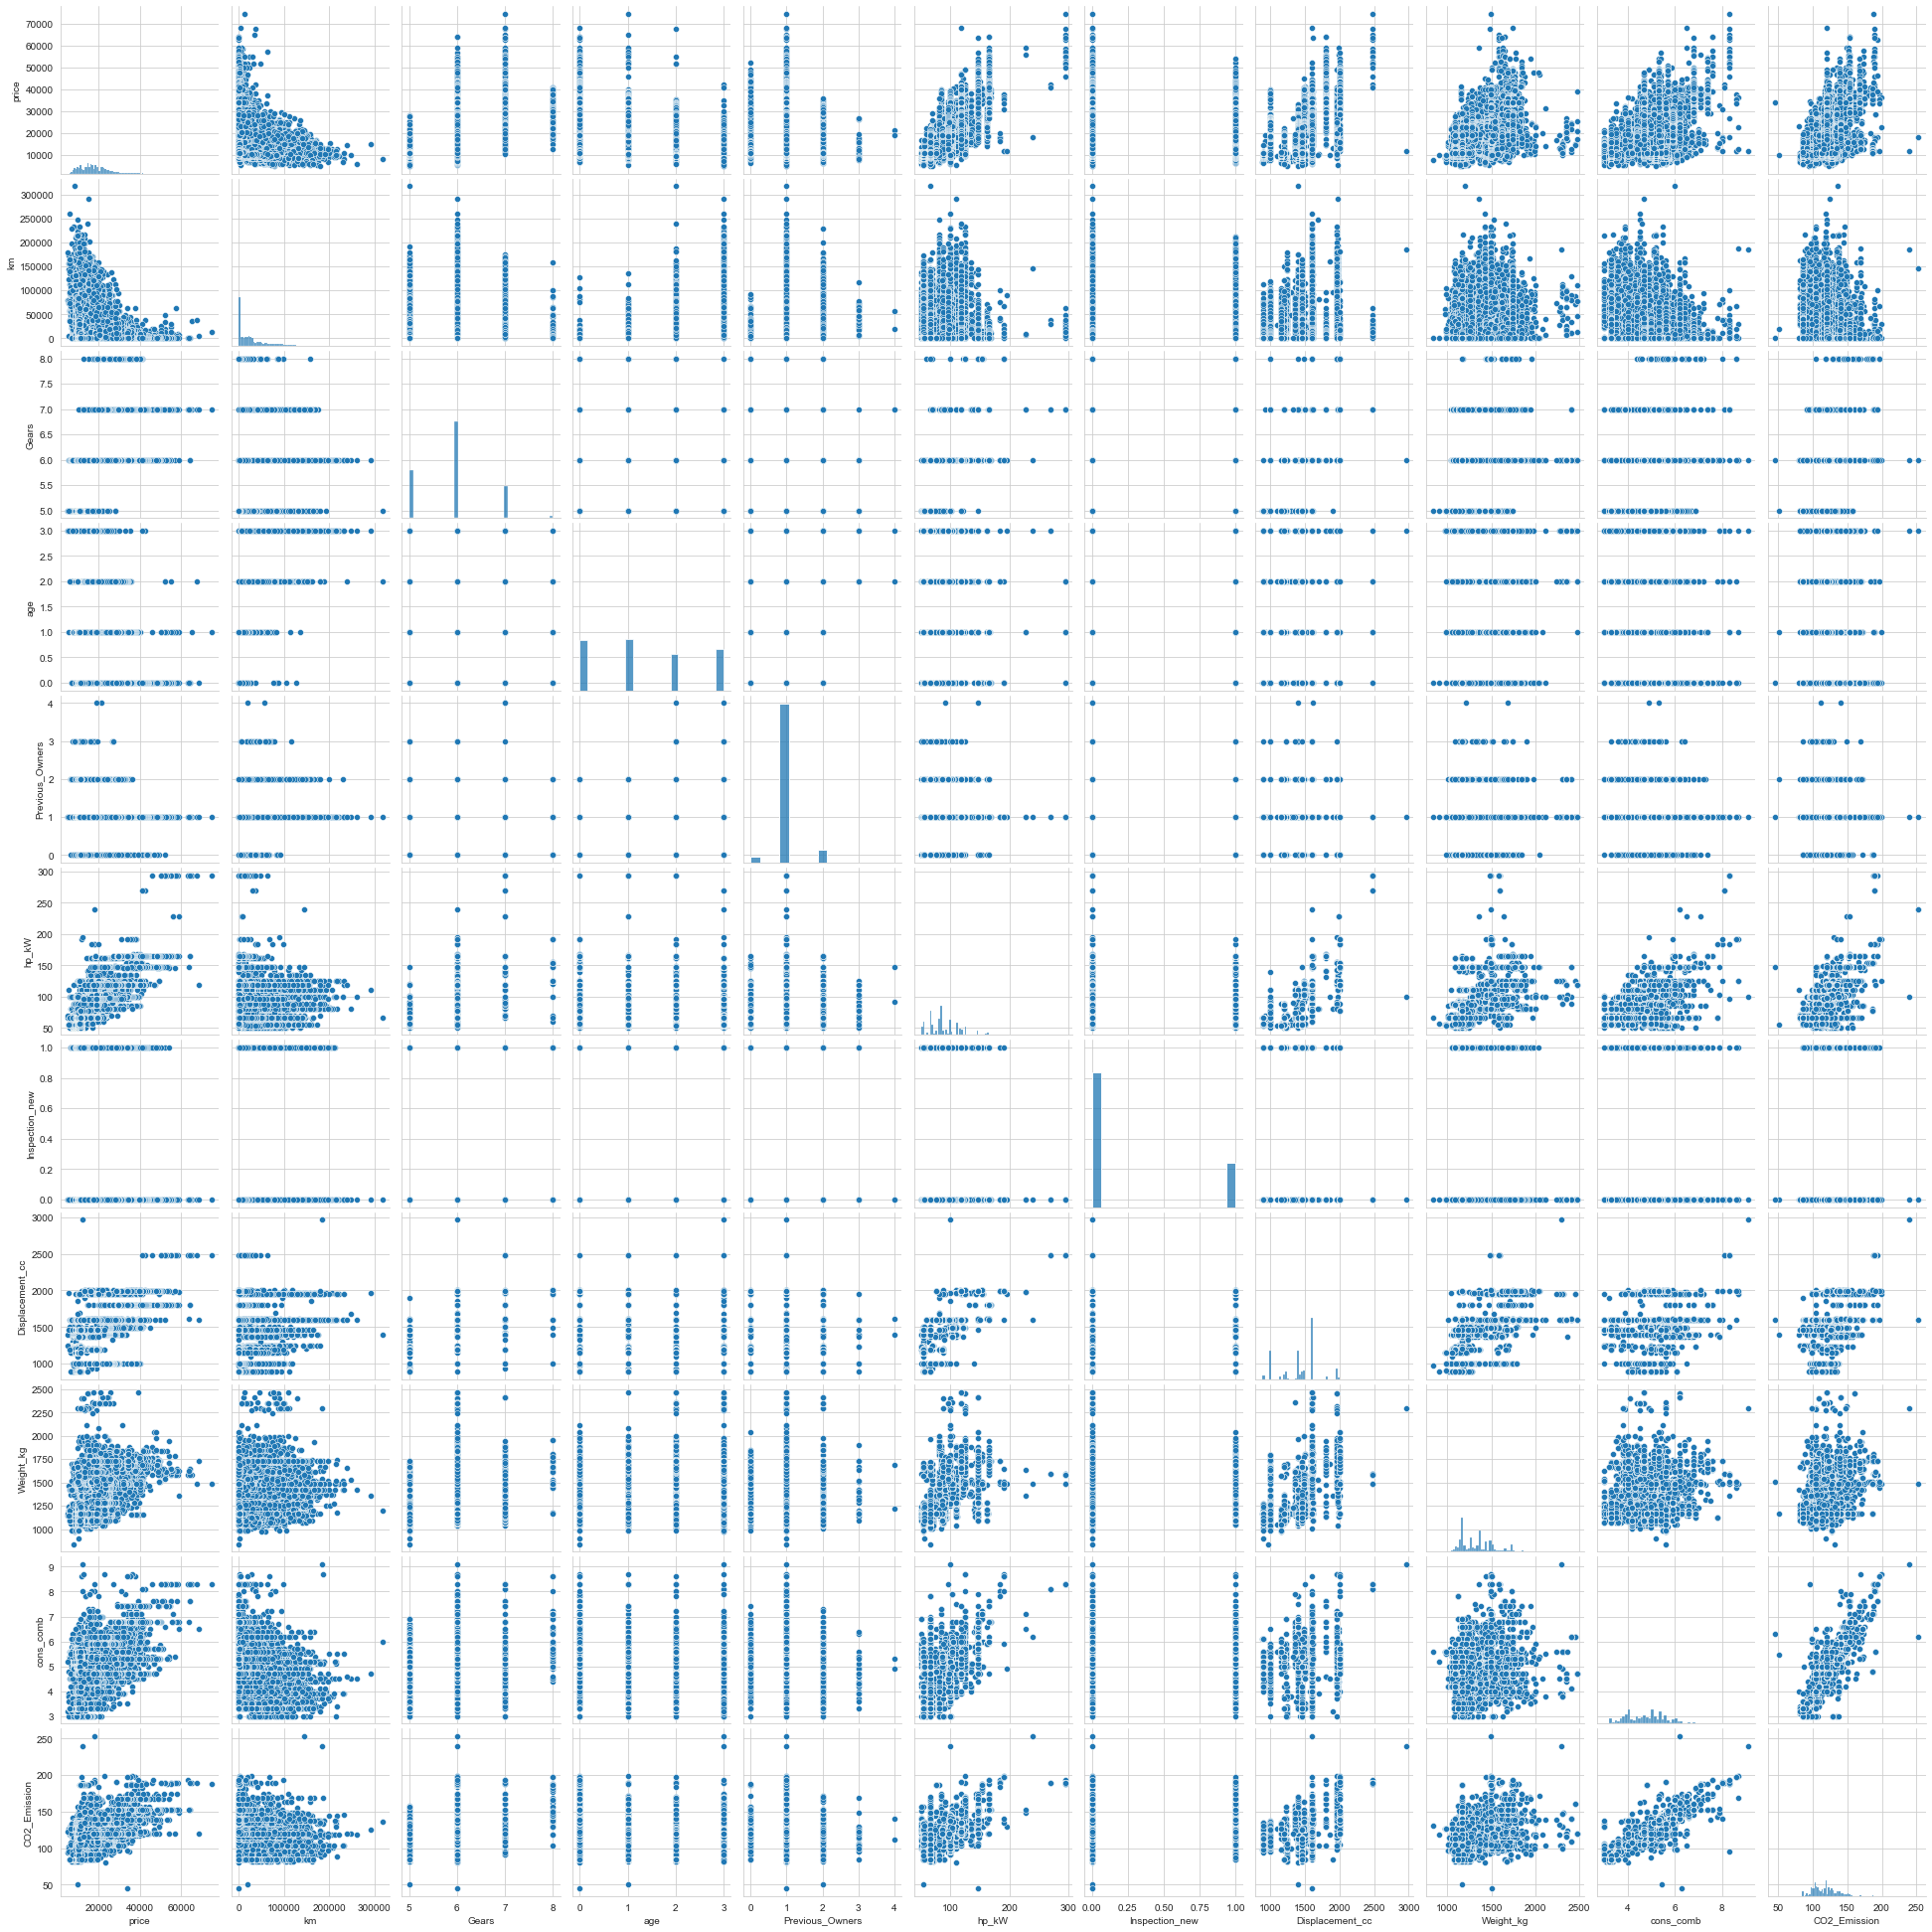

In [234]:
sns.pairplot(df_num, size=2.5);

**Because of the multicollinearity between "CO2_Emission and cons_comb", I have decided to drop cons_comb column.** 

Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

In [235]:
df.drop("cons_comb", axis=1, inplace = True)

In [236]:
df.shape

(15909, 22)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dummy Operation</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15909 non-null  object 
 2   price                15909 non-null  int64  
 3   km                   15909 non-null  float64
 4   Type                 15909 non-null  object 
 5   Fuel                 15909 non-null  object 
 6   Comfort_Convenience  15909 non-null  object 
 7   Entertainment_Media  15909 non-null  object 
 8   Extras               15909 non-null  object 
 9   Safety_Security      15909 non-null  object 
 10  Gears                15909 non-null  float64
 11  age                  15909 non-null  float64
 12  Previous_Owners      15909 non-null  float64
 13  hp_kW                15909 non-null  float64
 14  Inspection_new       15909 non-null  int64  
 15  Paint_Type           15909 non-null 

In [238]:
df.shape

(15909, 22)

In [239]:
df.to_csv("final_scout_not_dummy.csv", index=False)

In [240]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [241]:
df.drop(["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"], axis=1, inplace=True)

In [242]:
df.shape

(15909, 112)

In [243]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.000,80000.000,83450.000,73000.000,16200.000
Type,Used,Used,Used,Used,Used
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Gears,7.000,7.000,7.000,6.000,7.000
age,3.000,2.000,3.000,3.000,3.000
Previous_Owners,2.000,1.000,1.000,1.000,1.000
hp_kW,66.000,141.000,85.000,66.000,66.000


In [244]:
df_final = pd.get_dummies(df, drop_first=True)

In [245]:
df_final.shape

(15909, 131)

In [246]:
df_final.head().T

,0,1,2,3,4
price,15770.000,14500.000,14640.000,14500.000,16790.000
km,56013.000,80000.000,83450.000,73000.000,16200.000
Gears,7.000,7.000,7.000,6.000,7.000
age,3.000,2.000,3.000,3.000,3.000
Previous_Owners,2.000,1.000,1.000,1.000,1.000
hp_kW,66.000,141.000,85.000,66.000,66.000
Inspection_new,1.000,0.000,0.000,0.000,1.000
Displacement_cc,1422.000,1798.000,1598.000,1422.000,1422.000
Weight_kg,1220.000,1255.000,1135.000,1195.000,1135.000
CO2_Emission,99.000,129.000,99.000,99.000,109.000


In [247]:
df_final.to_csv("final_scout_dummy.csv", index=False)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of Handling with Outliers (Part - 03)</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

____